In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
#Displaying shape
df.shape

(105434, 11)

In [4]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [6]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [7]:
df.duplicated().sum()

np.int64(52997)

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,105434.000000,1.054340e+05,105434.000000,105434.000000
mean,2024.188981,1.626908e+05,158018.514179,21.103249
std,0.669665,2.137236e+05,74401.714026,40.714744
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.064000e+05,106400.000000,0.000000
50%,2024.000000,1.471000e+05,147000.000000,0.000000
75%,2025.000000,1.997000e+05,199000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df['job_title'].unique()

array(['Data Analist', 'Data Engineer', 'Engineer', 'Systems Engineer',
       'Analytics Engineer', 'Data Architect', 'Data Manager',
       'BI Developer', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'Business Intelligence Developer',
       'Product Manager', 'Data Scientist', 'AI Engineer',
       'Data Specialist', 'Research Engineer', 'Data Analyst',
       'Software Developer', 'Analyst', 'Software Engineer',
       'Site Reliability Engineer', 'Applied Scientist',
       'Computer Vision Engineer', 'Research Scientist',
       'Data Analytics Manager', 'Manager', 'AI Architect',
       'Data Developer', 'Solutions Architect', 'Architect', 'Stage',
       'Research Assistant', 'Business Intelligence Analyst',
       'Data Integration Engineer', 'Data Lead', 'Associate',
       'Quantitative Researcher', 'Business Intelligence Engineer',
       'Software Development Engineer', 'Data Management Specialist',
       'AI Developer', 'Data and Analytics Consultan

In [10]:
df['job_title'].count()

np.int64(105434)

In [11]:
df['experience_level'].unique()

array(['EN', 'EX', 'SE', 'MI'], dtype=object)

In [12]:
df['experience_level'].count()

np.int64(105434)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

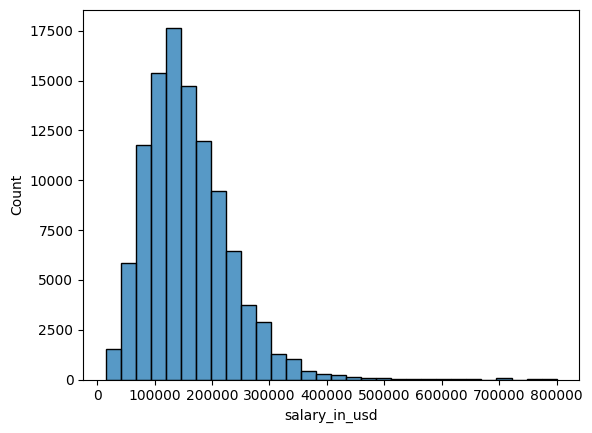

In [13]:
sns.histplot(df['salary_in_usd'],bins=30)

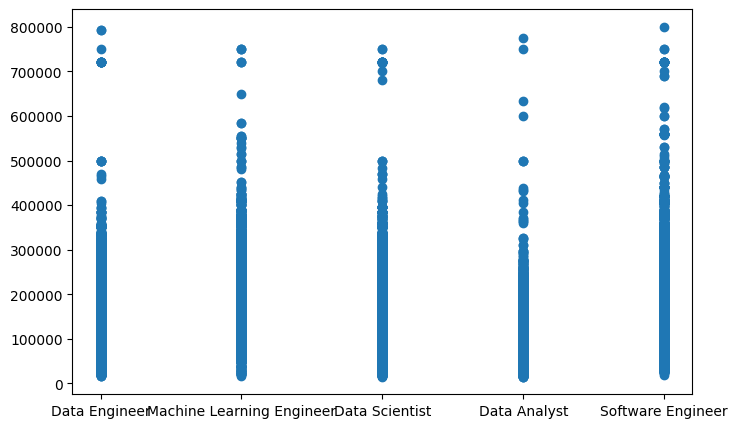

In [14]:
top_jobs = df['job_title'].value_counts().head(5).index
subset = df[df['job_title'].isin(top_jobs)]
plt.figure(figsize=(8,5))
plt.scatter(subset['job_title'],subset['salary_in_usd'])

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

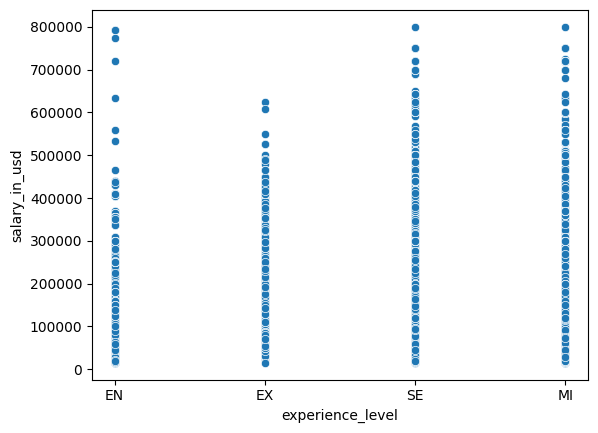

In [15]:
sns.scatterplot(data=df,x='experience_level',y='salary_in_usd',)

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

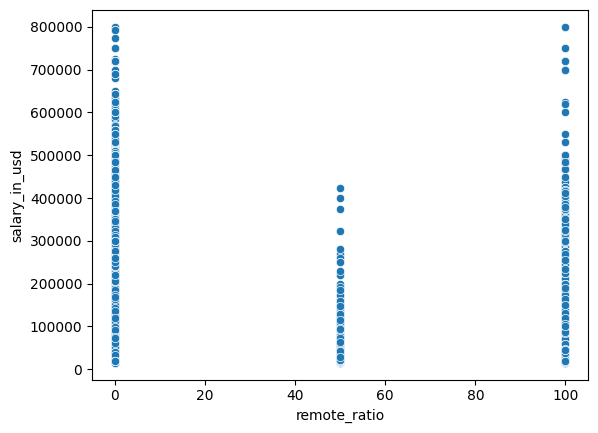

In [16]:
sns.scatterplot(data=df,y='salary_in_usd',x='remote_ratio',)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

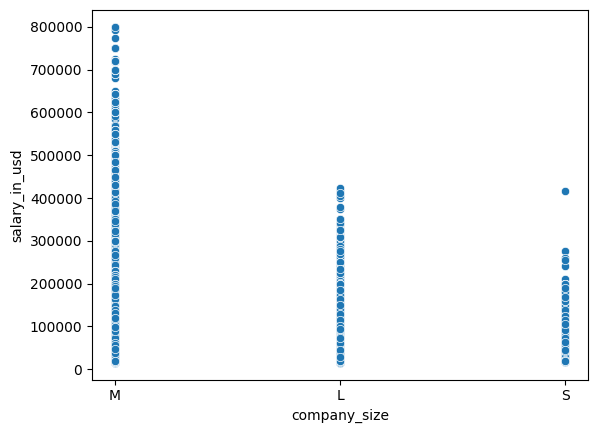

In [17]:
sns.scatterplot(data=df,y='salary_in_usd',x='company_size')

<Axes: >

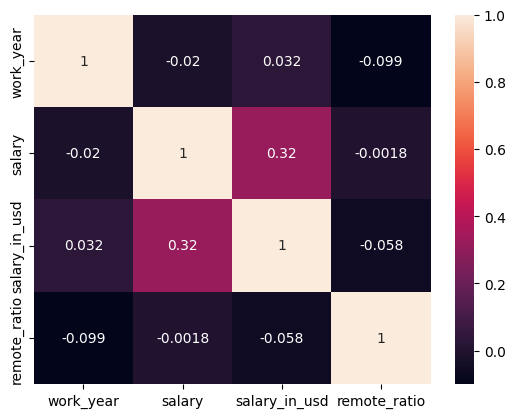

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

(array([7.5000e+01, 2.1800e+02, 1.6600e+03, 8.5230e+03, 9.4958e+04]),
 array([2020., 2021., 2022., 2023., 2024., 2025.]),
 <BarContainer object of 5 artists>)

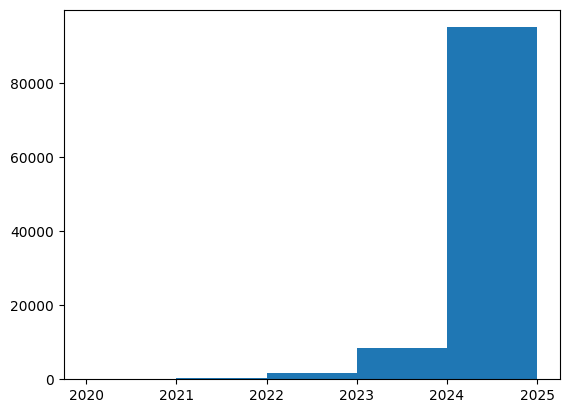

In [19]:
plt.hist(df['work_year'], bins =5)

<Axes: xlabel='company_size', ylabel='count'>

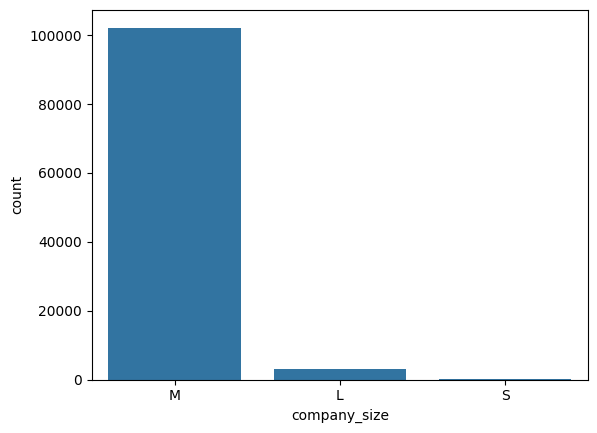

In [20]:
sns.countplot(data=df,x='company_size')

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

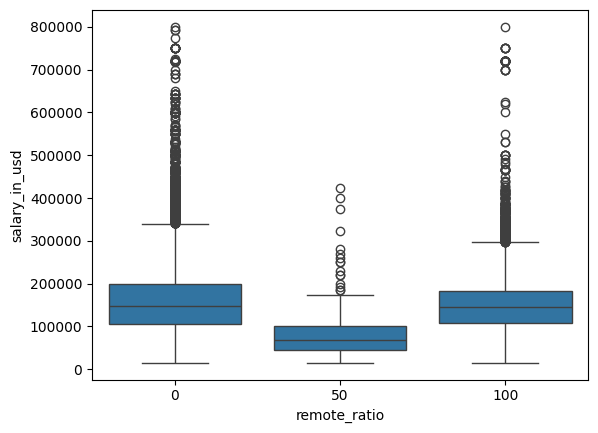

In [21]:
sns.boxplot(data=df,x='remote_ratio',y='salary_in_usd')

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

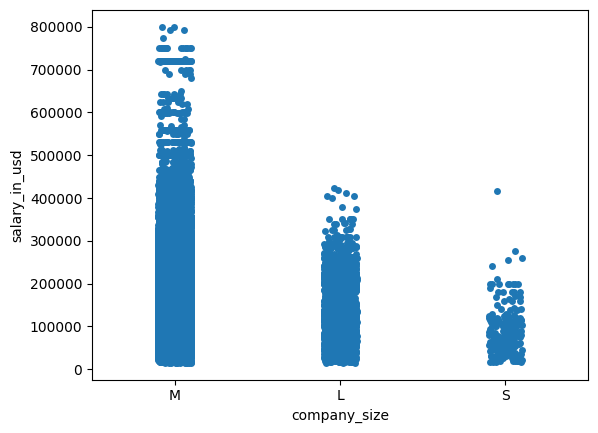

In [22]:
sns.stripplot(data=df,y='salary_in_usd',x='company_size', )

In [23]:
#encoding cat
from sklearn.preprocessing import LabelEncoder
l = ['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
le = LabelEncoder()
for i in l:
    df[i] = le.fit_transform(df[i])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   work_year           105434 non-null  int64
 1   experience_level    105434 non-null  int64
 2   employment_type     105434 non-null  int64
 3   job_title           105434 non-null  int64
 4   salary              105434 non-null  int64
 5   salary_currency     105434 non-null  int64
 6   salary_in_usd       105434 non-null  int64
 7   employee_residence  105434 non-null  int64
 8   remote_ratio        105434 non-null  int64
 9   company_location    105434 non-null  int64
 10  company_size        105434 non-null  int64
dtypes: int64(11)
memory usage: 8.8 MB


In [25]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(model,X_test,X_train,y_test,y_train):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  print(f"Accuracyfor your{model} is :")

  #r2 score
  print(f"Train R2 score for {model} is {r2_score(y_train,train_pred)}")
  print(f"Test R2 score for {model} is {r2_score(y_test,test_pred)}")

  #MAE
  print(f"Train MAE for {model} is {mean_absolute_error(y_train,train_pred)}")
  print(f"Test MAE for {model} is {mean_absolute_error(y_test,test_pred)}")

  #RMSE
  print(f"Train RMSE for {model} is {np.sqrt(mean_squared_error(y_train,train_pred))}")
  print(f"Test RMSE for {model} is {np.sqrt(mean_squared_error(y_test,test_pred))}")

In [29]:
from sklearn.linear_model import LinearRegression
Linear_Regression_model =LinearRegression()
Linear_Regression_model.fit(X_train,y_train)


LinearRegression()

In [30]:
y_pred=Linear_Regression_model.predict(X_test)

In [31]:
y_pred_train=Linear_Regression_model.predict(X_train)

In [32]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))

0.2466710714783773


In [33]:
evaluate_model(Linear_Regression_model,X_test,X_train,y_test,y_train)

Accuracyfor yourLinearRegression() is :
Train R2 score for LinearRegression() is 0.2466710714783773
Test R2 score for LinearRegression() is 0.28718168654498644
Train MAE for LinearRegression() is 45904.231178993155
Test MAE for LinearRegression() is 46002.94760197315
Train RMSE for LinearRegression() is 64433.1482860166
Test RMSE for LinearRegression() is 63369.7081652597


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge



In [35]:
ridge = Ridge()

In [36]:
ridge_param={
    "alpha":[0.1,1,10,100]
}

In [37]:
ridge_search = GridSearchCV(ridge,ridge_param,cv=5)

In [38]:
ridge_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [39]:
best_ridge = ridge_search.best_estimator_

In [40]:
evaluate_model(best_ridge,X_test,X_train,y_test,y_train)

Accuracyfor yourRidge(alpha=100) is :
Train R2 score for Ridge(alpha=100) is 0.2466624920931011
Test R2 score for Ridge(alpha=100) is 0.28712480159233
Train MAE for Ridge(alpha=100) is 45907.525023575705
Test MAE for Ridge(alpha=100) is 46007.04780162473
Train RMSE for Ridge(alpha=100) is 64433.51518765072
Test RMSE for Ridge(alpha=100) is 63372.23665734923


In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn_model = KNeighborsRegressor()

In [43]:
knn_params = {
    "n_neighbors":[1,3,5,7,9,11]
}

In [44]:
knn_search = GridSearchCV(knn_model,knn_params,cv=5)

In [45]:
knn_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [46]:
best_knn=knn_search.best_estimator_

In [47]:
evaluate_model(best_knn,X_test,X_train,y_test,y_train)

Accuracyfor yourKNeighborsRegressor(n_neighbors=1) is :
Train R2 score for KNeighborsRegressor(n_neighbors=1) is 1.0
Test R2 score for KNeighborsRegressor(n_neighbors=1) is 0.9818146871878164
Train MAE for KNeighborsRegressor(n_neighbors=1) is 0.0
Test MAE for KNeighborsRegressor(n_neighbors=1) is 1983.1369564186466
Train RMSE for KNeighborsRegressor(n_neighbors=1) is 0.0
Test RMSE for KNeighborsRegressor(n_neighbors=1) is 10121.681579094016


In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
DT_model = DecisionTreeRegressor()

In [50]:
DT_params = {
    "max_depth":[3,5,7,10],
    "min_samples_split":[2,5,10]

}

In [51]:
tree_search=GridSearchCV(DT_model,DT_params,cv=5)

In [52]:
tree_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]})

In [53]:
best_tree = tree_search.best_estimator_

In [54]:
best_tree

DecisionTreeRegressor(max_depth=10)

In [55]:
evaluate_model(best_tree,X_test,X_train,y_test,y_train)

Accuracyfor yourDecisionTreeRegressor(max_depth=10) is :
Train R2 score for DecisionTreeRegressor(max_depth=10) is 0.9997539023539918
Test R2 score for DecisionTreeRegressor(max_depth=10) is 0.9896780728122253
Train MAE for DecisionTreeRegressor(max_depth=10) is 429.51293951803
Test MAE for DecisionTreeRegressor(max_depth=10) is 650.8214537414091
Train RMSE for DecisionTreeRegressor(max_depth=10) is 1164.583839600631
Test RMSE for DecisionTreeRegressor(max_depth=10) is 7625.576428622764


In [56]:
pd.DataFrame({
    "feature": X.columns,
    "importance": best_tree.feature_importances_
}).sort_values(by = "importance", ascending=False)

,feature,importance
4,salary,0.982496
5,salary_currency,0.014430
6,employee_residence,0.001909
9,company_size,0.000596
0,work_year,0.000190
8,company_location,0.000155
3,job_title,0.000119
1,experience_level,0.000099
2,employment_type,0.000004
7,remote_ratio,0.000001


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf_model = RandomForestRegressor()

In [59]:
rf_params = ({
    "n_estimators":[50,100,150],
    "max_depth":[5,10,15],
    "max_features":["sqrt","log2"],
})

In [60]:
rf_search = GridSearchCV(rf_model,rf_params,cv=5)

In [61]:
rf_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [62]:
best_rf = rf_search.best_estimator_

In [63]:
evaluate_model(best_rf,X_test,X_train,y_test,y_train)

Accuracyfor yourRandomForestRegressor(max_depth=15, max_features='log2') is :
Train R2 score for RandomForestRegressor(max_depth=15, max_features='log2') is 0.9977454469026843
Test R2 score for RandomForestRegressor(max_depth=15, max_features='log2') is 0.9954746372496468
Train MAE for RandomForestRegressor(max_depth=15, max_features='log2') is 1642.9447228581748
Test MAE for RandomForestRegressor(max_depth=15, max_features='log2') is 1882.160912118111
Train RMSE for RandomForestRegressor(max_depth=15, max_features='log2') is 3524.9037556601247
Test RMSE for RandomForestRegressor(max_depth=15, max_features='log2') is 5049.158238275293
